## mnist

#### batch : 큰 데이터를 쪼개어 1회에 작은 단위로 가져다가 학습, next_batch()
#### epoch : batch를 반복하여 전체 데이터가 모두 소진되었을 때를 1 epoch
#### Vanishing Gradient  : 신경망이 깊어 질수록 입력신호가 사라진다(줄어든다), sigmoid 사용시
#### Relu  : Rectified Linear Unit, DNN(deep neural net) 구현시 sigmoid 대신 사용됨
#### dropout : 전체 신경망의 일부를 사용하지 않고 학습, 예측시는 전체를 사용


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (10000,)
5


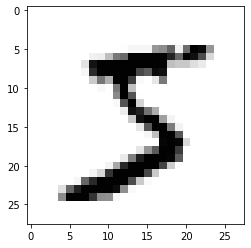

In [3]:
def show_one_image(n):
    print(type(x_train),x_train.shape) # (60000, 28, 28)
    print(type(y_train),y_train.shape) # (60000,)
    print(type(x_test),x_test.shape)   # (10000, 28, 28)
    print(type(y_test),y_test.shape)   # (10000,)
    
    image = x_train[n]
    print(y_train[n])
    
    plt.imshow(image,cmap='Greys')
    plt.show()

show_one_image(0)  


In [4]:
# one-hot 인코딩
nb_classes = 10   # 분류 class의 갯수(0~9)

Y_one_hot = tf.one_hot(y_train,nb_classes)  # (60000,10)
print(Y_one_hot.shape)

# X값의 shape을 2차원으로 변환
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# X값의 타입을 float형으로 변환
x_train = tf.cast(x_train,dtype=tf.float32)
print(x_train.shape,x_train.dtype)

x_test = tf.cast(x_test,dtype=tf.float32)
print(x_test.shape,x_test.dtype)

(60000, 10)
(60000, 784) <dtype: 'float32'>
(10000, 784) <dtype: 'float32'>


In [5]:
W = tf.Variable(tf.random.normal([784,nb_classes]), name = 'weight')
b = tf.Variable(tf.random.normal([nb_classes]), name = 'bias')
def logits(X):
    return tf.matmul(X,W) + b

def hypothesis(X):
    return tf.nn.softmax(logits(X))

In [6]:
# batch 사이즈로 나누어 학습, 효율적 이며 학습 시간 단축  , 미니배치

training_epoch = 25
batch_size = 600

# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
optimizer = tf.keras.optimizers.Adam(lr=0.01)

Y_one_hot = tf.one_hot(y_train,nb_classes)  # (60000,10)

print('****** Start Learning!!')
for epoch in range(training_epoch): # 25회
    
    avg_cost = 0
    
    # 100 = 60000/600
    total_batch = int(x_train.shape[0]/batch_size)
    for k in range(total_batch):  # 100회
        batch_xs = x_train[0 + k*batch_size:batch_size + k*batch_size]   # 600개의 X 데이터
        batch_ys = Y_one_hot[0 + k*batch_size:batch_size + k*batch_size] # 600개의 Y 데이터
        
        # 비용함수        
        def cost_func_batch():
            cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits(batch_xs),
                                             labels = batch_ys)
            cost =  tf.reduce_mean(cost_i)
            return cost
        
        # cost를 minimize 한다
        optimizer.minimize(cost_func_batch,var_list=[W,b])
        avg_cost += cost_func_batch().numpy()/total_batch
            
    print('Epoch:','%04d'%(epoch + 1),'cost:','{:.9f}'.format(avg_cost))
             
print('****** Learning Finished!!')

****** Start Learning!!
Epoch: 0001 cost: 679.831341553
Epoch: 0002 cost: 204.013199692
Epoch: 0003 cost: 148.471338272
Epoch: 0004 cost: 121.014010620
Epoch: 0005 cost: 104.027983322
Epoch: 0006 cost: 91.899360466
Epoch: 0007 cost: 82.785516434
Epoch: 0008 cost: 75.502935886
Epoch: 0009 cost: 69.220791283
Epoch: 0010 cost: 63.866671429
Epoch: 0011 cost: 59.300388031
Epoch: 0012 cost: 55.258858452
Epoch: 0013 cost: 51.781316242
Epoch: 0014 cost: 48.511157818
Epoch: 0015 cost: 45.778686104
Epoch: 0016 cost: 43.458511868
Epoch: 0017 cost: 41.204132786
Epoch: 0018 cost: 39.416348896
Epoch: 0019 cost: 37.413616943
Epoch: 0020 cost: 35.620225658
Epoch: 0021 cost: 34.091718893
Epoch: 0022 cost: 32.919920883
Epoch: 0023 cost: 31.858166885
Epoch: 0024 cost: 30.287328644
Epoch: 0025 cost: 28.749511623
****** Learning Finished!!


In [7]:
Y_one_hot = tf.one_hot(y_test,nb_classes)  # (10000,10)
print(Y_one_hot.shape)

# tf.argmax() : 값이 가장 큰 요소의 인덱스 값을 반환
def predict(X):
    return tf.argmax(hypothesis(X),axis=1)

correct_predict = tf.equal(predict(x_test),tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))
print("Accuracy:",accuracy.numpy()) # Accuracy: 0.8871

#예측
print('***** Predict')
pred = predict(x_test).numpy()
print(pred,y_test)

(10000, 10)
Accuracy: 0.8886
***** Predict
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


random =  4775 Label: 2
Prediction :  [2]


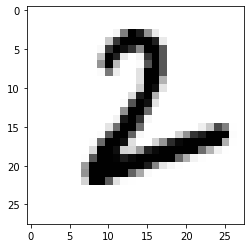

In [8]:
r = np.random.randint(0,x_test.shape[0] - 1) # 0 to 9999 random int number
# r = 1411   # Label: 0, Prediction :  [9]

print('random = ',r, 'Label:',y_test[r])

print('Prediction : ',predict(x_test[r:r+1]).numpy())

image = tf.reshape(x_test[r],(28,28))
plt.imshow(image,cmap='Greys')
plt.show()

## multi layer

In [18]:
W1 = tf.Variable(tf.random.normal([784,256]), name = 'weight1')
b1 = tf.Variable(tf.random.normal([256]), name = 'bias1')
W2 = tf.Variable(tf.random.normal([256,128]), name = 'weigh2')
b2 = tf.Variable(tf.random.normal([128]), name = 'bias2')
W3 = tf.Variable(tf.random.normal([128,64]), name = 'weight3')
b3 = tf.Variable(tf.random.normal([64]), name = 'bias3')
W4 = tf.Variable(tf.random.normal([64,nb_classes]), name = 'weight4')
b4 = tf.Variable(tf.random.normal([nb_classes]), name = 'bias4')

def layer1(X):
    # return  tf.sigmoid(tf.matmul(X,W1) + b1)  
    return  tf.nn.relu(tf.matmul(X,W1) + b1)
def layer2(X):  
    return  tf.nn.relu(tf.matmul(layer1(X),W2) + b2)
def layer3(X):  
    return  tf.nn.relu(tf.matmul(layer2(X),W3) + b3)

def logits(X):
    return tf.matmul(layer3(X),W4) + b4

def hypothesis(X):
    return tf.nn.softmax(logits(X))

In [19]:
training_epoch = 25
batch_size = 600

# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
optimizer = tf.keras.optimizers.Adam(lr=0.01)

Y_one_hot = tf.one_hot(y_train,nb_classes)  # (60000,10)

print('****** Start Learning!!')
for epoch in range(training_epoch): # 25회
    
    avg_cost = 0
    
    # 100 = 60000/600
    total_batch = int(x_train.shape[0]/batch_size)
    for k in range(total_batch):  # 100회
        batch_xs = x_train[0 + k*batch_size:batch_size + k*batch_size]   # 600개의 X 데이터
        batch_ys = Y_one_hot[0 + k*batch_size:batch_size + k*batch_size] # 600개의 Y 데이터
        
        # 비용함수        
        def cost_func_batch():
            cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits(batch_xs),
                                             labels = batch_ys)
            cost =  tf.reduce_mean(cost_i)
            return cost
        
        # cost를 minimize 한다
        optimizer.minimize(cost_func_batch,var_list=[W1,b1,W2,b2,W3,b3,W4,b4])
        avg_cost += cost_func_batch().numpy()/total_batch
            
    print('Epoch:','%04d'%(epoch + 1),'cost:','{:.9f}'.format(avg_cost))
             
print('****** Learning Finished!!')

****** Start Learning!!
Epoch: 0001 cost: 119502.580312500
Epoch: 0002 cost: 16150.860361328
Epoch: 0003 cost: 9282.477192383
Epoch: 0004 cost: 6165.985930176
Epoch: 0005 cost: 4322.239316406
Epoch: 0006 cost: 3118.563673706
Epoch: 0007 cost: 2308.672020874
Epoch: 0008 cost: 1772.304414062
Epoch: 0009 cost: 1384.609462280
Epoch: 0010 cost: 1113.523960876
Epoch: 0011 cost: 858.923336487
Epoch: 0012 cost: 684.452433624
Epoch: 0013 cost: 584.258270111
Epoch: 0014 cost: 485.024843979
Epoch: 0015 cost: 410.554129486
Epoch: 0016 cost: 337.701938858
Epoch: 0017 cost: 299.743330078
Epoch: 0018 cost: 245.470464897
Epoch: 0019 cost: 210.194263048
Epoch: 0020 cost: 194.404066677
Epoch: 0021 cost: 154.470020313
Epoch: 0022 cost: 155.330385792
Epoch: 0023 cost: 124.495004232
Epoch: 0024 cost: 109.857149169
Epoch: 0025 cost: 102.557226403
****** Learning Finished!!


In [20]:
Y_one_hot = tf.one_hot(y_test,nb_classes)  # (10000,10)
print(Y_one_hot.shape)

# tf.argmax() : 값이 가장 큰 요소의 인덱스 값을 반환
def predict(X):
    return tf.argmax(hypothesis(X),axis=1)

correct_predict = tf.equal(predict(x_test),tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))
print("Accuracy:",accuracy.numpy()) # Accuracy: 0.9534

#예측
print('***** Predict')
pred = predict(x_test).numpy()
print(pred,y_test)

(10000, 10)
Accuracy: 0.9345
***** Predict
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


random =  6909 Label: 5
Prediction :  [5]


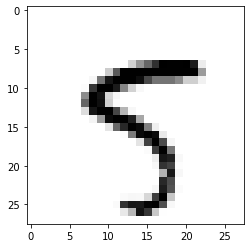

In [21]:
r = np.random.randint(0,x_test.shape[0] - 1) # 0 to 9999 random int number
# r = 1411   # Label: 0, Prediction :  [9]

print('random = ',r, 'Label:',y_test[r])

print('Prediction : ',predict(x_test[r:r+1]).numpy())

image = tf.reshape(x_test[r],(28,28))
plt.imshow(image,cmap='Greys')
plt.show()

## CNN

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


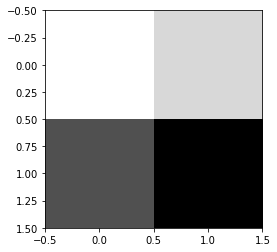

In [24]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)


# 입력 이미지 : (1,3,3,1)
# 1 : 이미지의 갯수
# 3 : 가로 크기
# 3 : 세로 크기
# 1 : color, Grey scale ==> 1, RGB ==> 3

# filter : (2,2,1,1)
# 2 : 가로 크기
# 2 : 세로 크기
# 1 : color, Grey scale ==> 1, RGB ==> 3
# 1 : filter 의 갯수

# (N - F)/strides + 1
# 출력 이미지 : (3 - 2)/1 + 1 = 2, zero padding을 안했을 때 (padding='VALID')
# (1,3,3,1) ---> (1,2,2,1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape) # (1, 2, 2, 1)

# 시각화
plt.imshow(conv2d_image.reshape(2,2),cmap='Greys')
plt.show()

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)


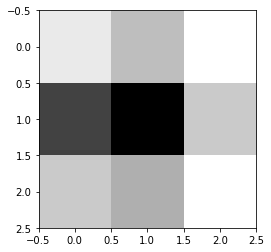

In [25]:
#  filter : (2,2,1,1), strides : 1
# (1,3,3,1) --> (1,3,3,1)

weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape) # (1, 3, 3, 1)

# 시각화
plt.imshow(conv2d_image.reshape(3,3),cmap='Greys')
plt.show()

(2, 2, 1, 3)
(1, 3, 3, 3)
(3, 3, 3, 1)


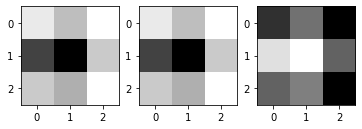

In [28]:
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],     
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight.shape) # (2, 2, 1, 3)

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image.shape) # (1, 3, 3, 3)

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
print(conv2d_image.shape) # (3, 3, 3, 1)

for i,one_image in enumerate(conv2d_image):
    plt.subplot(1,3,i + 1)
    plt.imshow(one_image.reshape(3,3),cmap='Greys')
plt.show()

In [32]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

(1, 28, 28, 1)
(1, 14, 14, 5)
(5, 14, 14, 1)


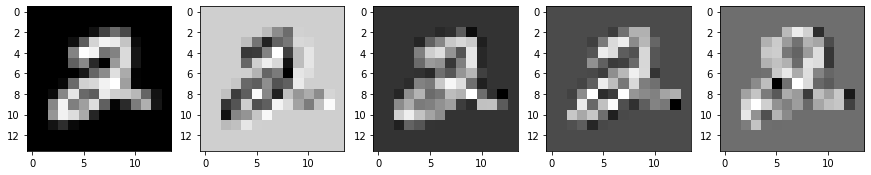

In [33]:
image = x_train[5]


#### MNIST conv2d layer
# image : (1,28,28,1)
# filter : (3,3,1,5) , 필터 5개
# stride : (1,2,2,1) , padding = 'SAME'
# 출력 이미지 : (28+1 - 3)/2 + 1 = 14
# (1,28,28,1) --> (1,14,14,5)

img = image.reshape(-1,28,28,1)
print(img.shape) # (1, 28, 28, 1)

W = tf.Variable(tf.random.normal([3,3,1,5]),name='weight') # filter = weight
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image.shape)     # (1, 14, 14, 5)

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
# print(conv2d_image)
print(conv2d_image.shape) # (5,14,14,1)

plt.figure(figsize=(15,15))
for i,one_image in enumerate(conv2d_image):
    #print(one_image)
    plt.subplot(1,5,i + 1)
    plt.imshow(one_image.reshape(14,14),cmap='Greys')
plt.show()

In [34]:
nb_classes = 10  # 분류 class의 갯수(0~9)

Y_one_hot = tf.one_hot(y_train,nb_classes)   # (60000, 10)
print(Y_one_hot.shape)                       # (60000, 10) , (2차원)

# X값의 타입을 float형으로 변환
x_train = tf.cast(x_train,dtype=tf.float32)
print(x_train.shape,x_train.dtype)

x_test = tf.cast(x_test,dtype=tf.float32)
print(x_test.shape,x_test.dtype)

# X값의 shape을 4차원으로 변환
X_img = tf.reshape(x_train,[-1,28,28,1])

(60000, 10)
(60000, 28, 28) <dtype: 'float32'>
(10000, 28, 28) <dtype: 'float32'>


In [35]:
# (?, 28, 28, 1) --> (?, 14, 14, 32)

# <1> conv2d
# L1 input image shape : (?, 28, 28, 1)
# filter : (3,3,1,32), 필터 32개
# strides : (1,1,1,1), padding='SAME'
# 출력 이미지 : (28+2 - 3)/1 + 1 = 28
# (?, 28, 28, 1) --> (?, 28, 28, 32)
W1 = tf.Variable(tf.random.normal([3,3,1,32]),name='weight1')
def L1_conv2d(X):
    return tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME')

# <2> relu
def L1_relu(X):
    return tf.nn.relu(L1_conv2d(X))  # shape 변화가 없다

# <3> max_pool
# input image : (?, 28, 28, 32)
# ksize : (1,2,2,1), strides : (1,2,2,1), padding='SAME'
# 출력 이미지 : (28+1 - 2)/2 + 1 = 14
#  (?, 28, 28, 32) -->  (?, 14, 14, 32)
def L1_MaxPool(X):
    return tf.nn.max_pool(L1_relu(X),ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


# Layer 2 : conv2d - relu - max_pool
# (?, 14, 14, 32) --> (?,7,7,64)

# <1> conv2d
# L1 input image shape : (?, 14, 14, 32)
# filter : (3,3,32,64), 필터 64개
# strides : (1,1,1,1), padding='SAME'
# 출력 이미지 : (14+2 - 3)/1 + 1 = 14
# (?, 14, 14, 32) --> (?, 14,14,64)
W2 = tf.Variable(tf.random.normal([3,3,32,64]),name='weight2') # filter
def L2_conv2d(X):
    return tf.nn.conv2d(L1_MaxPool(X),W2,strides=[1,1,1,1],padding='SAME')

# <2> relu
def L2_relu(X):
    return tf.nn.relu(L2_conv2d(X))  # shape 변화가 없다

# <3> max_pool
# input image : (?, 14,14,64)
# ksize : (1,2,2,1), strides : (1,2,2,1), padding='SAME'
# 출력 이미지 : (14+1 - 2)/2 + 1 = 7
#  (?, 14,14,64) -->  (?,7,7,64)
def L2_MaxPool(X):
    return tf.nn.max_pool(L2_relu(X),ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


# Layer 3 : conv2d - relu - max_pool
# (?,7,7,64) --> 

# <1> conv2d
# L1 input image shape : (?,7,7,64)
# filter : (3,3,64,128), 필터 128개
# strides : (1,1,1,1), padding='SAME'
# 출력 이미지 : (7+2 - 3)/1 + 1 = 7
# (?,7,7,64) --> (?,7,7,128)
W3 = tf.Variable(tf.random.normal([3,3,64,128]),name='weight3') # filter
def L3_conv2d(X):
    return tf.nn.conv2d(L2_MaxPool(X),W3,strides=[1,1,1,1],padding='SAME')

# <2> relu
def L3_relu(X):
    return tf.nn.relu(L3_conv2d(X))  # shape 변화가 없다

# <3> max_pool
# input image : (?,7,7,128)
# ksize : (1,2,2,1), strides : (1,2,2,1), padding='SAME'
# 출력 이미지 : (7+1 - 2)/2 + 1 = 4
#  (?,7,7,128) -->  (?,4,4,128)
def L3_MaxPool(X):
    return tf.nn.max_pool(L3_relu(X),ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME') 

# <4> flatten layer : 다차원 배열을 2차원으로 변환하여 FC layer에 전달한다
def L3_flat(X):
    return tf.reshape(L3_MaxPool(X),[-1,4*4*128])


# Layer 4 : FC(Fully Connected Layer)
# (?,4*4*128) * (4*4*128,512) = (?, 512)
# nb_classes = 10
W4 = tf.Variable(tf.random.normal([4*4*128,512]), name='weight4')
b4 = tf.Variable(tf.random.normal([512]), name='bias4')
def L4_relu(X):
    return  tf.nn.relu(tf.matmul(L3_flat(X),W4) + b4)


# Layer 5 : FC(Fully Connected Layer), Final Output layer
# (?, 512) * (512,10) = (?,10)
nb_classes = 10
W5 = tf.Variable(tf.random.normal([512,nb_classes]), name='weight5')
b5 = tf.Variable(tf.random.normal([nb_classes]), name='bias5')

# 예측 함수(hypothesis) : H(X) = softmax(W*X + b)
def logits(X):
    return tf.matmul(L4_relu(X),W5) + b5

def hypothesis(X):
    return tf.nn.softmax(logits(X))

In [37]:
training_epoch = 15
batch_size = 600

# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
optimizer = tf.keras.optimizers.Adam(lr=0.01)

Y_one_hot = tf.one_hot(y_train,nb_classes)   # (60000, 10)

print('***** Start Learning!!')
for epoch in range(training_epoch): # 100회
    
    avg_cost = 0
    
    # 100 = 60000/600
    total_batch = int(x_train.shape[0]/batch_size)
    for k in range(total_batch):  # 100회
        batch_xs = x_train[0 + k*batch_size:batch_size + k*batch_size]   # 600개의 X 데이터
        batch_ys = Y_one_hot[0 + k*batch_size:batch_size + k*batch_size] # 600개의 Y 데이터
        
        # X값의 shape을 4차원으로 변환
        X_img = tf.reshape(batch_xs,[-1,28,28,1])

        # 비용함수        
        def cost_func_batch():
            cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits(X_img),
                                             labels = batch_ys)
            cost =  tf.reduce_mean(cost_i)
            return cost
        
        # cost를 minimize 한다
        optimizer.minimize(cost_func_batch,var_list=[W1,W2,W3,W4,b4,W5,b5])
        avg_cost += cost_func_batch().numpy()/total_batch
            
    print('Epoch:','%04d'%(epoch + 1),'cost:','{:.9f}'.format(avg_cost))
             
print('***** Learning Finished!!')

***** Start Learning!!
Epoch: 0001 cost: 312606.064785156
Epoch: 0002 cost: 51414.374111328
Epoch: 0003 cost: 26053.613532715
Epoch: 0004 cost: 12570.024640503
Epoch: 0005 cost: 7753.242632217
Epoch: 0006 cost: 4480.575723877
Epoch: 0007 cost: 3291.807254333
Epoch: 0008 cost: 2263.349541569
Epoch: 0009 cost: 1752.223042288
Epoch: 0010 cost: 1472.119443817
Epoch: 0011 cost: 653.724023132
Epoch: 0012 cost: 440.382363777
Epoch: 0013 cost: 539.083477802
Epoch: 0014 cost: 641.891404209
Epoch: 0015 cost: 464.275226765
***** Learning Finished!!


In [38]:
Y_one_hot = tf.one_hot(y_test,nb_classes)    # (10000,10)
# print(Y_one_hot.shape)                       # (10000,10)  , (2차원)

# tf.argmax() : 값이 가장 큰 요소의 인덱스 값을 반환
def predict(X):
    return tf.argmax(hypothesis(X),axis=1)

# X값의 shape을 4차원으로 변환
X_img = tf.reshape(x_test,[-1,28,28,1])
        
correct_predict = tf.equal(predict(X_img),tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))
print("Accuracy:",accuracy.numpy()) # Accuracy: 0.9534

#예측
print('***** Predict')
pred = predict(X_img).numpy()
print(pred,y_test)

Accuracy: 0.9796
***** Predict
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


In [ ]:
# [1] softmax 사용
# 1 layers              -------> Accuracy  : 0.8871
# 4 layers  sigmoid     -------> Accuracy  : 0.9033
# 4 layers  relu        -------> Accuracy  : 0.9534  

# [2] CNN 사용
# 3 layers              -------> Accuracy  : 0.9721  (epoch=15)
# 3 layers              -------> Accuracy  : 0.9831  (epoch=50)
# 5 layers              -------> Accuracy  : 0.9824  (epoch=50)
# 5 layers              -------> Accuracy  : 0.9876  (epoch=100)